# Evaluating performance of models on test set

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from joblib import load

In [2]:
import sys
src_path = "../src/"
sys.path.append(src_path)
from preprocessing import preprocess_train, preprocess_test

Read and preprocess data

In [3]:
# Read data
df_train = pd.read_csv("../data/music_genre_train.csv")

In [4]:
# Preprocess data
res_dict = preprocess_train(df_train)
df_train = res_dict['dataframe']
utils_preprocessing = res_dict['utils']

Read test data and also do preprocessing

In [5]:
df_test = pd.read_csv("../data/music_genre_test.csv")

In [6]:
# Preprocess data
df_test = preprocess_test(df_test, utils_preprocessing)

In [7]:
X_test = df_test.drop('music_genre', axis=1)
y_test = df_test['music_genre']

## Evaluation - Random Forest

In [8]:
# Load model
model_rf = load('../models/rf_0_572/random_forest.joblib')

# Do predictions on test data
y_pred = model_rf.predict(X_test)

# Calculate accuracy
acc_rf = accuracy_score(y_pred, y_test)

# Report
print("Random forest accuracy:\n", acc_rf)

Random forest accuracy:
 0.5731677324151501


## Evaluation - Neural Network

In [9]:
# Load model
model_nn = keras.models.load_model('../models/keras_0_572/')

# Get predictions on test data
y_pred_softmax = model_nn.predict(X_test)

# Transform softmax predictions to labels
y_pred = np.zeros(y_pred_softmax.shape[0], dtype='int32')
for i in range(len(y_pred)):
    y_pred[i] = np.argmax(y_pred_softmax[i,:])

# Calculate accuracy
acc_nn = accuracy_score(y_pred, y_test)
    
# Report
print("Neural net accuracy:\n", acc_nn)

Neural net accuracy:
 0.5676340383669454


## Evaluation - SVM Classifier

In [10]:
# Load model
model_svm = load('../models/svm_0_575/svm.joblib')

# Do predictions on test data
y_pred = model_svm.predict(X_test)

# Calculate accuracy
acc_svm = accuracy_score(y_pred, y_test)

# Report
print("SVM classifier accuracy:\n", acc_svm)

SVM classifier accuracy:
 0.5803000491883915


## Comparison

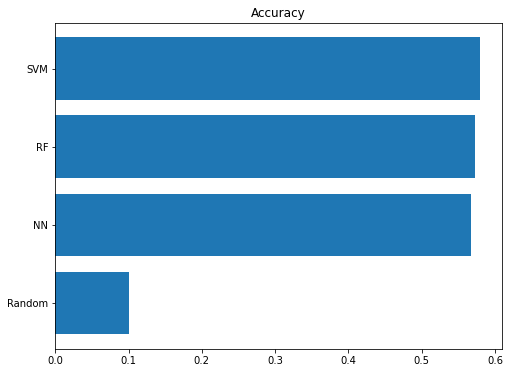

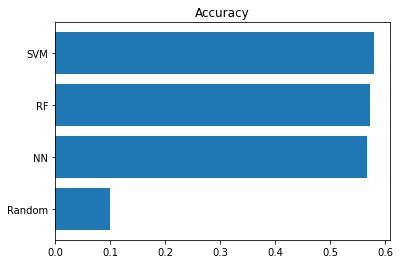

In [30]:
names = ['Random', 'NN', 'RF', 'SVM']
values = [0.1, acc_nn, acc_rf, acc_svm]

# Plot bigger image
plt.figure(figsize=(8, 6))
plt.barh(names, values)
plt.title("Accuracy")
plt.savefig('../images/models_cmp_big.jpg')
plt.show()

# PLot smaller image
plt.figure(figsize=(6, 4))
plt.barh(names, values)
plt.title("Accuracy")
plt.savefig('../images/models_cmp_small.jpg')
plt.show()

## Confusion matrix

In [31]:
y_pred = model_svm.predict(X_test)

In [32]:
conf_matr = confusion_matrix(y_pred, y_test)

In [43]:
# Get text labels
label_enc = utils_preprocessing[0]
labels = [i for i in range(0, 10)]
labels = label_enc.inverse_transform(labels)

In [44]:
conf_matr_disp = ConfusionMatrixDisplay(
    confusion_matrix = conf_matr,
    display_labels = labels
)

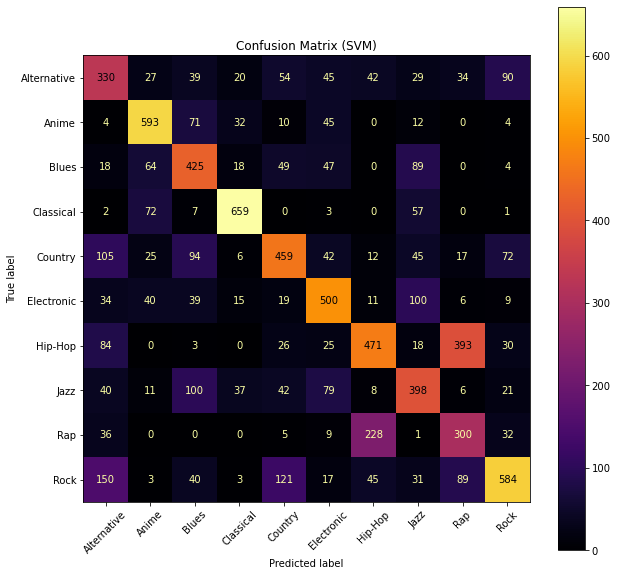

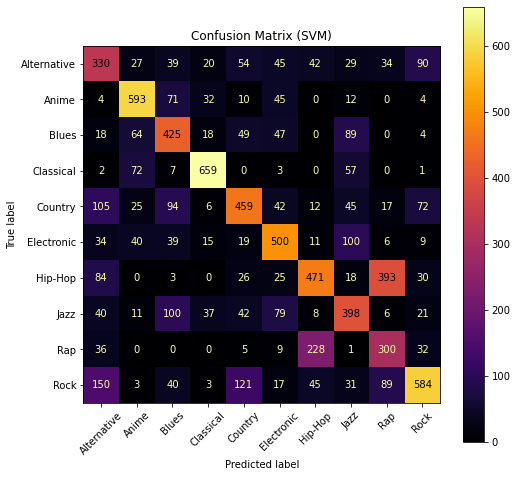

In [74]:
# Big figure
fig, ax = plt.subplots(figsize=(10, 10))
conf_matr_disp.plot(
    xticks_rotation = 45,
    ax = ax,
    cmap = 'inferno'
)
plt.title('Confusion Matrix (SVM)')
plt.savefig('../images/conf_matr_big.jpg')

# Small figure
fig, ax = plt.subplots(figsize=(8, 8))
conf_matr_disp.plot(
    xticks_rotation = 45,
    ax = ax,
    cmap = 'inferno'
)
plt.title('Confusion Matrix (SVM)')
plt.savefig('../images/conf_matr_small.jpg')